In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("random_soil_data.csv")

soil_data=pd.DataFrame(data)

soil_data.head()

,pH,Moisture (%),Bearing Capacity (kN/m²),Soil Type
0,5.96,38.32,288.44,Sandy
1,7.70,42.62,251.41,Silty
2,7.16,14.55,210.55,Sandy
3,6.48,27.43,280.81,Peaty
4,5.73,44.09,416.76,Loamy


In [5]:
soil_data.isnull().sum()

pH                          0
Moisture (%)                0
Bearing Capacity (kN/m²)    0
Soil Type                   0
dtype: int64

Text(0.5, 1.0, 'Soil Type Distribution')

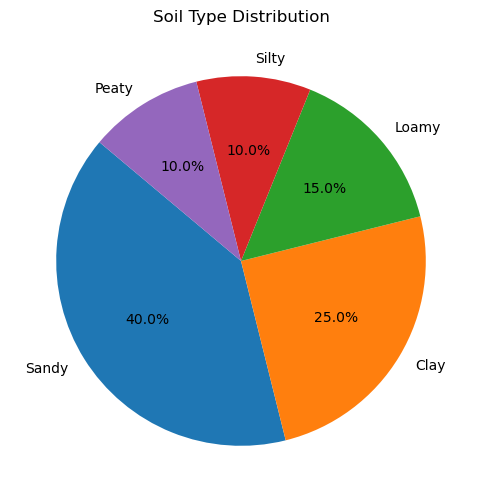

In [15]:
soil_types = ["Sandy", "Clay", "Loamy", "Silty", "Peaty"]
counts = [40, 25, 15, 10, 10]  # Percentage distribution of each type

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=soil_types, autopct="%1.1f%%", startangle=140)

plt.title("Soil Type Distribution")


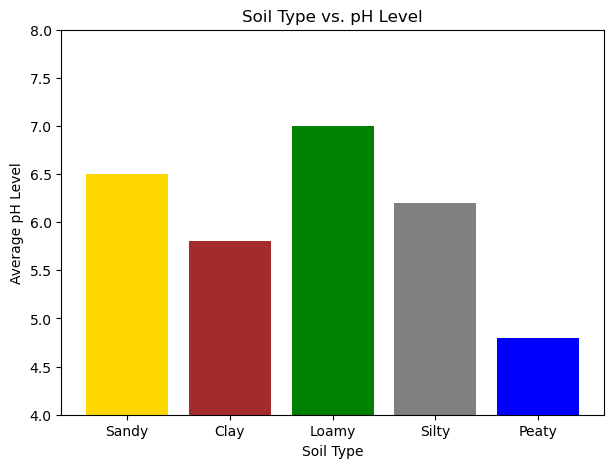

In [19]:
soil_types = ["Sandy", "Clay", "Loamy", "Silty", "Peaty"]

# Create Bar Chart
plt.figure(figsize=(7, 5))
plt.bar(soil_types, pH_levels, color=['gold', 'brown', 'green', 'gray', 'blue'])

# Labels and Title
plt.xlabel("Soil Type")
plt.ylabel("Average pH Level")
plt.title("Soil Type vs. pH Level")
plt.ylim(4, 8)  # Set y-axis range

# Show plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13648\3803597366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Soil Type", y="Moisture (%)", data=soil_data, palette="coolwarm")


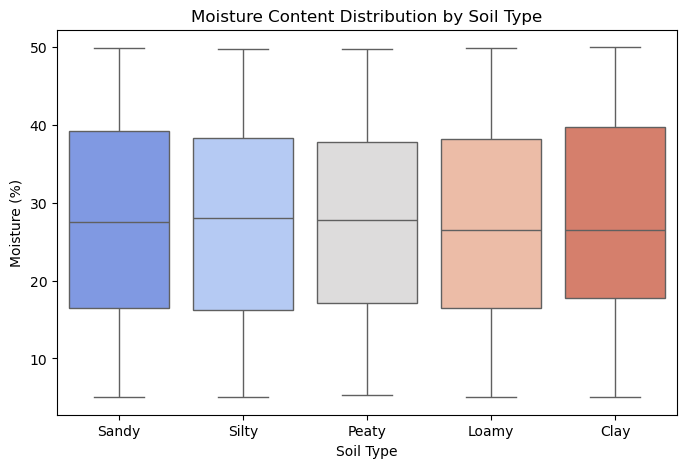

In [21]:
# Create Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Soil Type", y="Moisture (%)", data=soil_data, palette="coolwarm")

# Title
plt.title("Moisture Content Distribution by Soil Type")
plt.show()


In [22]:
soil_data["Soil Type"].unique()

array(['Sandy', 'Silty', 'Peaty', 'Loamy', 'Clay'], dtype=object)

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [39]:
encoded_soil=mlb.fit_transform(soil_data["Soil Type"])

encoded_df = pd.DataFrame(encoded_soil, columns=mlb.classes_)

# Merge with original DataFrame (dropping "Soil_Types")
df_encoded = pd.concat([soil_data.drop(columns=["Soil Type"]), encoded_df], axis=1)

# Print final DataFrame
df_encoded

,pH,Moisture (%),Bearing Capacity (kN/m²),C,L,P,S,a,d,e,i,l,m,n,o,t,y
0,5.96,38.32,288.44,0,0,0,1,1,1,0,0,0,0,1,0,0,1
1,7.70,42.62,251.41,0,0,0,1,0,0,0,1,1,0,0,0,1,1
2,7.16,14.55,210.55,0,0,0,1,1,1,0,0,0,0,1,0,0,1
3,6.48,27.43,280.81,0,0,1,0,1,0,1,0,0,0,0,0,1,1
4,5.73,44.09,416.76,0,1,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8.75,5.69,170.31,0,0,1,0,1,0,1,0,0,0,0,0,1,1
2996,7.72,7.35,110.87,1,0,0,0,1,0,0,0,1,0,0,0,0,1
2997,4.62,28.12,411.31,0,0,0,1,0,0,0,1,1,0,0,0,1,1
2998,6.44,41.56,382.18,1,0,0,0,1,0,0,0,1,0,0,0,0,1
